In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
restViolT = pd.read_csv('restViolT.csv')
restViolT.head()

,Unnamed: 0,INSPECTION DATE,restViolations,boro_ct201
0,0,2016-04-30,5,1000201
1,1,2016-05-31,2,1000201
2,2,2016-06-30,0,1000201
3,3,2016-07-31,0,1000201
4,4,2016-08-31,0,1000201


In [9]:
dataPoisT = pd.read_csv('dataPoisT.csv')
data311compT = pd.read_csv('data311compT.csv')
dataPoisT.drop(columns={'Unnamed: 0'}, inplace=True)
data311compT.drop(columns={'Unnamed: 0'}, inplace=True)
#data311compT.rename(columns={'pois_complaints':'311complaints'}, inplace=True)
data311compT.head()

,Created Date,311comp,boro_ct201
0,2015-06-30,1,1000100
1,2014-11-30,1,1000201
2,2014-12-31,0,1000201
3,2015-01-31,0,1000201
4,2015-02-28,0,1000201


In [25]:
combTemp = restViolT.merge(dataPoisT, left_on=['boro_ct201', 'INSPECTION DATE'], 
                           right_on=['boro_ct201', 'Created Date'], how='outer')
AllT = combTemp.merge(data311compT, on=['boro_ct201', 'Created Date'], how='outer')

AllT.fillna(value={'restViolations':0, 'poisCases':0, '311comp':0, 'Created Date':AllT['INSPECTION DATE'], 
                  'INSPECTION DATE':AllT['Created Date']}, inplace=True)
AllT.drop(columns={'Unnamed: 0'}, inplace=True)
AllT.head()

,INSPECTION DATE,restViolations,boro_ct201,Created Date,poisCases,311comp
0,2016-04-30,5.0,1000201,2016-04-30,0.0,0.0
1,2016-05-31,2.0,1000201,2016-05-31,0.0,0.0
2,2016-06-30,0.0,1000201,2016-06-30,0.0,0.0
3,2016-07-31,0.0,1000201,2016-07-31,0.0,0.0
4,2016-08-31,0.0,1000201,2016-08-31,0.0,0.0


In [26]:
ct = gpd.read_file('/Users/devashishkhulbe/Downloads/Data/2010 Census Tracts/geo_export_a0d9c6b6-aa01-4614-864e-ae8521d74700.shp')
ct = ct[['boro_ct201', 'shape_area', 'geometry']]
pop = pd.read_csv('dataPoisNT.csv')
pop = pop[['boro_ct201', 'Population']]
pop.drop_duplicates(subset=['boro_ct201'], inplace=True)
ct['boro_ct201'] = ct['boro_ct201'].astype(int)
ct = ct.merge(pop, on='boro_ct201')
ct.head()

,boro_ct201,shape_area,geometry,Population
0,5000900,2.497010e+06,POLYGON ((-74.07920577013245 40.64343078374567...,2112
1,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316
2,1010000,1.860938e+06,POLYGON ((-73.96802436915851 40.75957814005282...,1992
3,1010200,1.860993e+06,POLYGON ((-73.97124277307127 40.76093641847906...,230
4,1010400,1.864600e+06,POLYGON ((-73.97445730550224 40.76229308352487...,966


In [27]:
ct = ct[ct.Population != 0]

AllT = ct.merge(AllT, on='boro_ct201')
AllT.head()

,boro_ct201,shape_area,geometry,Population,INSPECTION DATE,restViolations,Created Date,poisCases,311comp
0,5000900,2.497010e+06,POLYGON ((-74.07920577013245 40.64343078374567...,2112,2014-11-30,0.0,2014-11-30,1.0,0.0
1,5000900,2.497010e+06,POLYGON ((-74.07920577013245 40.64343078374567...,2112,2018-12-31,0.0,2018-12-31,0.0,1.0
2,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316,2015-03-31,3.0,2015-03-31,1.0,0.0
3,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316,2015-04-30,4.0,2015-04-30,1.0,3.0
4,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316,2015-05-31,3.0,2015-05-31,1.0,2.0


In [29]:
AllT['violPres'] = AllT['restViolations']/AllT['Population']
AllT['311compPres'] = AllT['311comp']/AllT['Population']
AllT['poisPpop'] = AllT['poisCases']/AllT['Population']
AllT.head()

,boro_ct201,shape_area,geometry,Population,INSPECTION DATE,restViolations,Created Date,poisCases,311comp,violPres,311compPres,poisPpop
0,5000900,2.497010e+06,POLYGON ((-74.07920577013245 40.64343078374567...,2112,2014-11-30,0.0,2014-11-30,1.0,0.0,0.000000,0.000000,0.000473
1,5000900,2.497010e+06,POLYGON ((-74.07920577013245 40.64343078374567...,2112,2018-12-31,0.0,2018-12-31,0.0,1.0,0.000000,0.000473,0.000000
2,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316,2015-03-31,3.0,2015-03-31,1.0,0.0,0.000410,0.000000,0.000137
3,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316,2015-04-30,4.0,2015-04-30,1.0,3.0,0.000547,0.000410,0.000137
4,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316,2015-05-31,3.0,2015-05-31,1.0,2.0,0.000410,0.000273,0.000137


In [30]:
AllT[['violPres', '311compPres', 'poisPpop']].corr()

,violPres,311compPres,poisPpop
violPres,1.00000,0.315920,0.172620
311compPres,0.31592,1.000000,0.173132
poisPpop,0.17262,0.173132,1.000000


/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


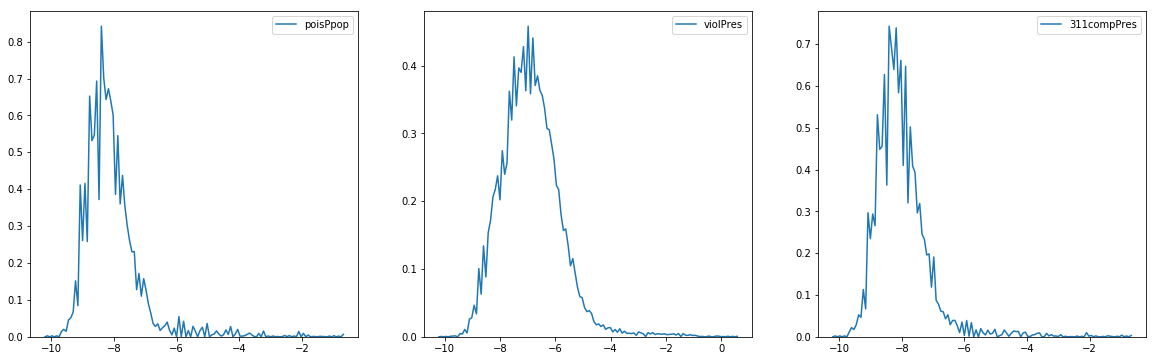

In [31]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(np.log(AllT['poisPpop']), bw=0.005, ax=ax1)

ax2 = fig.add_subplot(132)
sns.kdeplot(np.log(AllT['violPres']), bw=0.005, ax=ax2)

ax3 = fig.add_subplot(133)
sns.kdeplot(np.log(AllT['311compPres']), bw=0.005, ax=ax3)

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/numpy/linalg/linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.p

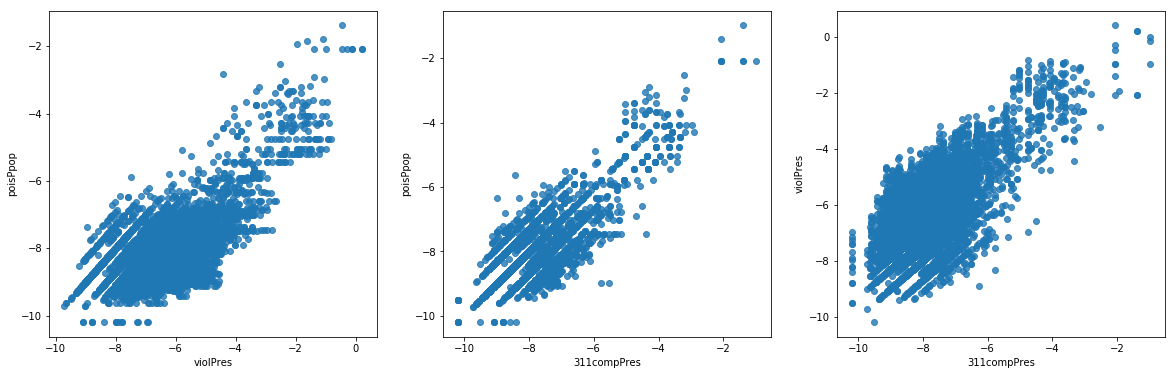

In [33]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.regplot(np.log(AllT['violPres']), np.log(AllT['poisPpop']))

ax2 = fig.add_subplot(132)
sns.regplot(np.log(AllT['311compPres']), np.log(AllT['poisPpop']))

ax2 = fig.add_subplot(133)
sns.regplot(np.log(AllT['311compPres']), np.log(AllT['violPres']))

In [34]:
NrestWviol = pd.read_csv('NrestWviol.csv')
NrestWviol.drop(columns={'Unnamed: 0'}, inplace=True)
NrestWviol.head()

,NrestWviol,boro_ct201
0,118,1009800
1,97,1010000
2,69,1010200
3,104,1010400
4,120,1011300


In [35]:
AllT = AllT.merge(NrestWviol, on='boro_ct201', how='outer')
AllT.fillna(value={'NrestWviol':0}, inplace=True)
AllT.head()

,boro_ct201,shape_area,geometry,Population,INSPECTION DATE,restViolations,Created Date,poisCases,311comp,violPres,311compPres,poisPpop,NrestWviol
0,5000900,2.497010e+06,POLYGON ((-74.07920577013245 40.64343078374567...,2112.0,2014-11-30,0.0,2014-11-30,1.0,0.0,0.000000,0.000000,0.000473,0.0
1,5000900,2.497010e+06,POLYGON ((-74.07920577013245 40.64343078374567...,2112.0,2018-12-31,0.0,2018-12-31,0.0,1.0,0.000000,0.000473,0.000000,0.0
2,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316.0,2015-03-31,3.0,2015-03-31,1.0,0.0,0.000410,0.000000,0.000137,118.0
3,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316.0,2015-04-30,4.0,2015-04-30,1.0,3.0,0.000547,0.000410,0.000137,118.0
4,1009800,1.906016e+06,POLYGON ((-73.96432543478758 40.75638153099091...,7316.0,2015-05-31,3.0,2015-05-31,1.0,2.0,0.000410,0.000273,0.000137,118.0


In [37]:
AllT['ViolProp'] = AllT['NrestWviol']/AllT['Population']
AllT[['violPres', '311compPres', 'poisPpop', 'NrestWviol', 'ViolProp']].corr()

,violPres,311compPres,poisPpop,NrestWviol,ViolProp
violPres,1.000000,0.315920,0.172620,0.123088,0.573009
311compPres,0.315920,1.000000,0.173132,0.051808,0.439654
poisPpop,0.172620,0.173132,1.000000,0.028589,0.241724
NrestWviol,0.123088,0.051808,0.028589,1.000000,0.250371
ViolProp,0.573009,0.439654,0.241724,0.250371,1.000000


In [39]:
AllT['violPres'] = (AllT['violPres'] - AllT['violPres'].mean())/AllT['violPres'].std()
AllT['311compPres'] = (AllT['311compPres'] - AllT['311compPres'].mean())/AllT['311compPres'].std()

AllT[['violPres', '311compPres', 'poisPpop', 'NrestWviol', 'ViolProp']].corr()

,violPres,311compPres,poisPpop,NrestWviol,ViolProp
violPres,1.000000,0.315920,0.172620,0.123088,0.573009
311compPres,0.315920,1.000000,0.173132,0.051808,0.439654
poisPpop,0.172620,0.173132,1.000000,0.028589,0.241724
NrestWviol,0.123088,0.051808,0.028589,1.000000,0.250371
ViolProp,0.573009,0.439654,0.241724,0.250371,1.000000
